In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("ex1data2.txt",names = ['size','bedrooms','prize'])
data.head()

,size,bedrooms,prize
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
def normalization(data):
    return (data - data.mean())/data.std()
data = normalization(data)
data.insert(0,'ones',1)
data.head()


,ones,size,bedrooms,prize
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [5]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]
X = np.array(X)
y = np.array(y)
y.shape

(47,)

In [6]:
y = y.reshape(47,1)

In [7]:
X.shape

(47, 3)

In [8]:
m= len(X)
def costFunction(X,y,theta):
    inner = np.power(X @ theta - y,2)
    return np.sum(inner)/(2*m)
theta = np.zeros((X.shape[1],y.shape[-1]))
cost_init = costFunction(X,y,theta)
print(cost_init)


0.48936170212765967


In [9]:

def gradientDescent(X,y,theta,alpha,inters):
    costs = []
    for i in range(iters):
        theta = theta - (X.T@(X@theta - y))*alpha/m
        cost = costFunction(X,y,theta)
        costs.append(cost)
    return theta,costs



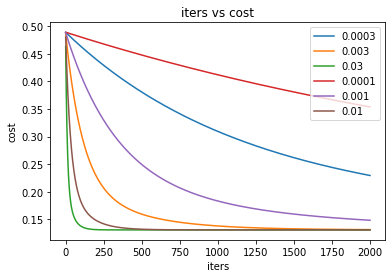

In [10]:
candidate_alpha=[0.0003,0.003,0.03,0.0001,0.001,0.01]
iters = 2000

fig,ax = plt.subplots()
for alpha in candidate_alpha:
    _,costs = gradientDescent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label = alpha)
    ax.legend()
ax.set(xlabel = 'iters',ylabel = 'cost',title = 'iters vs cost')
plt.show()
